In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('tweets.csv')

In [3]:
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


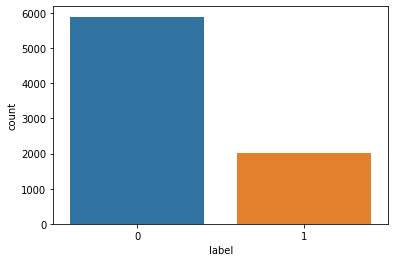

In [4]:
sns.countplot(x='label',data=df)

In [5]:
df[df['label']==1]['tweet']

4       What amazing service! Apple won't even talk to...
5       iPhone software update fucked up my phone big ...
10      hey #apple when you make a new ipod dont make ...
11      Ha! Not heavy machinery but it does what I nee...
12      Contemplating giving in to the iPhone bandwago...
                              ...                        
7901    @brendan_brady1: The new apple advert can fuck...
7902    All I wanna do is put music from my iTunes on ...
7904    #FuckYou #Apple one thing stops working and I ...
7908    SECOND FUCKING TIME. Stay on hold for 30 mins ...
7913    Ok so my galaxy crashed after one day now I ha...
Name: tweet, Length: 2026, dtype: object

In [6]:
Y=df['label']
X=df.drop(columns='label',axis=1)

In [7]:
len(Y),len(X)

(7920, 7920)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
cv=CountVectorizer(max_df=0.80,analyzer=text_process)
X_cv=cv.fit_transform(X['tweet'])

In [47]:
import string


In [48]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() ]

In [49]:
X_train_cv,X_test_cv,Y_train,Y_test=train_test_split(X_cv,Y,test_size=0.2)

In [50]:
X_train_cv=X_train_cv.toarray()
X_test_cv=X_test_cv.toarray()

In [51]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
model=MultinomialNB()

In [53]:
model.fit(X_train_cv,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
model.score(X_train_cv,Y_train)

0.9239267676767676

In [58]:
model.score(X_test_cv,Y_test)

0.8390151515151515

In [55]:
all_predictions = model.predict(X_test_cv)
print (all_predictions)

[0 1 0 ... 0 0 0]


In [57]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, all_predictions))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1182
           1       0.62      0.94      0.75       402

    accuracy                           0.84      1584
   macro avg       0.80      0.87      0.81      1584
weighted avg       0.89      0.84      0.85      1584

